# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

*Notebook generated with assistance from AI. Please use caution and independently verify the code, results, and interpretations.*

## Introduction and Overview

This notebook provides an introduction to Dandiset [000617 - Allen Institute Openscope: Sequence Learning Project](https://dandiarchive.org/dandiset/000617/0.250312.0130).

The Sequence Learning Project investigates how mice learn and predict repeating sequences of natural movie stimuli, with neural activity recorded using two-photon calcium imaging. Multiple visual areas and cortical layers are recorded simultaneously, alongside behavioral data.

This notebook walks you through:
- An overview and exploration of the Dandiset's content
- How to access and load remote NWB data using the DANDI API
- Visualizations of imaging ROIs and extracted calcium traces
- Summaries and visualizations of the experimental structure (stimulus intervals, presentation counts)
- Examples of accessing behavioral and event-detection data

The goal is to help you get started with reanalysis and exploration of this rich resource.

## What You'll Need

The following packages are required (assumed installed):
- dandi
- pynwb
- remfile
- h5py
- matplotlib
- numpy
- pandas
- scikit-image (for ROI mask outlines)

The notebook uses streaming to access remote NWB files without full downloads.

## Accessing the Dandiset: Listing Example NWB Files

Let's use the DANDI API to list some example NWB assets.

In [1]:
from dandi.dandiapi import DandiAPIClient
from itertools import islice

# Connect to DANDI and access the Dandiset
client = DandiAPIClient()
dandiset_id = "000617"
dandiset_version = "0.250312.0130"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List the first 10 NWB files in the Dandiset
assets = dandiset.get_assets_by_glob("*.nwb")
example_files = list(islice(assets, 10))

print("Example NWB files in DANDI:000617 (first 10):\n")
print("| # | Path | Size (MB) |")
print("|---|------|-----------|")
for i, asset in enumerate(example_files):
    size_mb = asset.size / 1e6
    print(f"| {i+1} | {asset.path} | {size_mb:.1f} |")
print("\nEach file generally represents one imaging session and field-of-view.")

Example NWB files in DANDI:000617 (first 10):

| # | Path | Size (MB) |
|---|------|-----------|
| 1 | sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb | 21166.3 |
| 2 | sub-684475/sub-684475_ses-1294084428-acq-1294179943-raw-movies_ophys.nwb | 21161.4 |
| 3 | sub-684475/sub-684475_ses-1293785946-acq-1293914859-raw-movies_ophys.nwb | 21174.8 |
| 4 | sub-684475/sub-684475_ses-1294084428-acq-1294179942-raw-movies_ophys.nwb | 21157.7 |
| 5 | sub-684475/sub-684475_ses-1294259213-acq-1294370666-raw-movies_ophys.nwb | 21179.6 |
| 6 | sub-684475/sub-684475_ses-1294259213-acq-1294370664-raw-movies_ophys.nwb | 21178.5 |
| 7 | sub-684475/sub-684475_ses-1293785946-acq-1293914856-raw-movies_ophys.nwb | 21203.0 |
| 8 | sub-684475/sub-684475_ses-1294259213-acq-1294370663-raw-movies_ophys.nwb | 21155.1 |
| 9 | sub-684475/sub-684475_ses-1293785946-acq-1293914853-raw-movies_ophys.nwb | 21160.0 |
| 10 | sub-684475/sub-684475_ses-1293785946-acq-1293914860-raw-movies_ophys.nwb | 21

## Loading a Remote NWB File

Here we'll use `remfile` to stream a representative NWB file remotely (no full download), and load it with `pynwb`.

We will focus on a single representative session/field for the demonstrations below.

In [2]:
import pynwb
import h5py
import remfile

# Select one example file for demonstration
asset_path = "sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb"
asset = next(dandiset.get_assets_by_glob(asset_path))

# Stream the NWB file using remfile + h5py
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.3.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring Segmented Cells (ROIs) and Imaging Context

Each NWB file contains a segmentation table describing the spatial properties of the extracted ROIs ("cells") from one imaging field.

Let's load the segmentation table and summarize its contents.

In [3]:
import pandas as pd

# Access ROI/cell segmentation table and info
seg_mod = nwb.processing['ophys'].data_interfaces['image_segmentation']
seg_table = seg_mod.plane_segmentations['cell_specimen_table']
cells_df = seg_table.to_dataframe()

print("Number of segmented ROIs/cells:", cells_df.shape[0])
print("Segmentation table columns:\n", list(cells_df.columns))
print("\nExample rows:\n", cells_df.head(5))

# Imaging plane metadata
im_plane = seg_table.imaging_plane
print("\nImaging plane info:")
print(f"  Description: {im_plane.description}")
print(f"  Location: {im_plane.location}")
print(f"  Excitation Wavelength (nm): {im_plane.excitation_lambda}")
print(f"  Indicator: {im_plane.indicator}")
print(f"  Imaging Rate (Hz): {im_plane.imaging_rate}")

Number of segmented ROIs/cells: 18
Segmentation table columns:
 ['cell_specimen_id', 'height', 'mask_image_plane', 'max_correction_down', 'max_correction_left', 'max_correction_right', 'max_correction_up', 'valid_roi', 'width', 'x', 'y', 'image_mask']

Example rows:
 

            cell_specimen_id  height  mask_image_plane  max_correction_down  \
id                                                                            
1294200207                -1      18                 0                  6.0   
1294200209                -1      22                 0                  6.0   
1294200210                -1      17                 0                  6.0   
1294200212                -1      15                 0                  6.0   
1294200216                -1      17                 0                  6.0   

            max_correction_left  max_correction_right  max_correction_up  \
id                                                                         
1294200207                 12.0                   9.0               13.0   
1294200209                 12.0                   9.0               13.0   
1294200210                 12.0                   9.0               13.0   
1294200212                 12.0                   9.0             

### Visualizing ROI (Cell) Outlines on Mean Projection Image

The following plot overlays ROI segmentation outlines (first 10 ROIs shown for clarity) onto the mean projection image from this imaging field.

**Note:** In this Dandiset, spatial alignment between segmentation masks and the background image may not be perfect, due to possible coordinate frame differences in image processing pipelines. Use these overlays for qualitative, not quantitative, alignment.

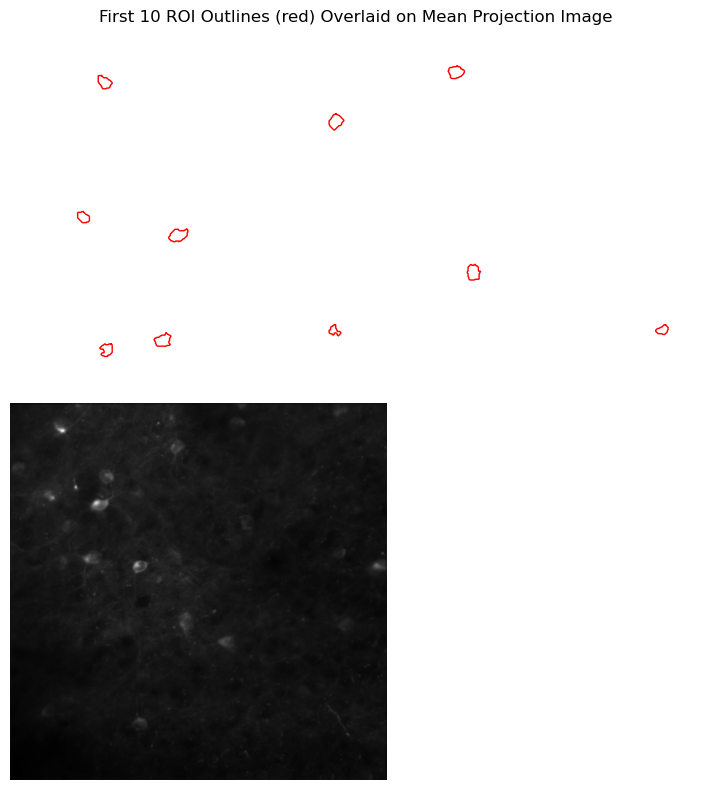

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import find_contours

# Load mean projection image
avg_img = nwb.processing['ophys'].data_interfaces['images'].images['average_image'].data[:]

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(avg_img, cmap='gray', origin='lower')

# Overlay first 10 ROI outlines
for i, row in cells_df.head(10).iterrows():
    mask = np.array(row['image_mask'])
    y0, x0 = row['y'], row['x']  # mask anchor: top-left in pixels
    contours = find_contours(mask.astype(float), 0.5)
    for contour in contours:
        # contour: array of (row, col) in local mask
        ax.plot(x0 + contour[:, 1], y0 + contour[:, 0], color='red', lw=1)

ax.set_title('First 10 ROI Outlines (red) Overlaid on Mean Projection Image')
ax.axis('off')
plt.tight_layout()
plt.show()

## Visualizing Calcium Activity: ΔF/F Traces

Each NWB file provides ΔF/F traces (normalized fluorescence) for each segmented cell, at each timepoint in the session.

Here we extract and plot the ΔF/F traces for the first 5 ROIs as an example.

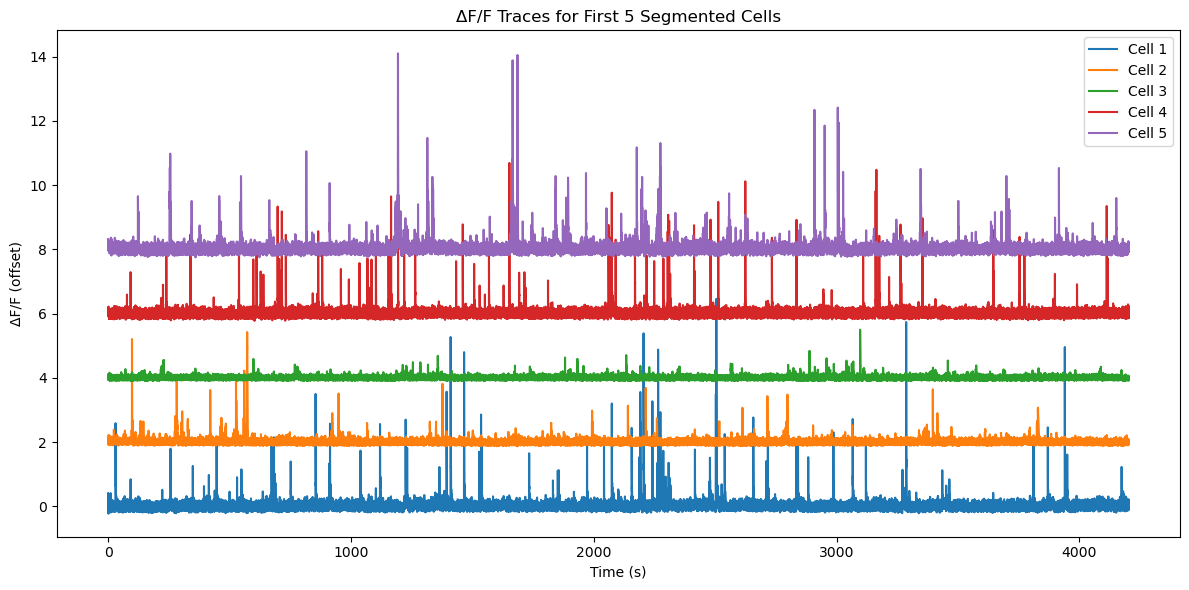

In [5]:
# Extract dF/F traces and timestamps
dff = nwb.processing['ophys'].data_interfaces['dff'].roi_response_series['traces']
dff_data = dff.data[:].T  # shape: n_cells x n_timepoints
stamps = dff.timestamps[:]
t = stamps - stamps[0]  # zero-relative time axis

# Plot traces for the first 5 cells
n_plot = min(5, dff_data.shape[0])
plt.figure(figsize=(12, 6))
offset = 2  # vertical offset for clarity
for i in range(n_plot):
    plt.plot(t, dff_data[i] + i*offset, label=f'Cell {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('ΔF/F (offset)')
plt.title('ΔF/F Traces for First 5 Segmented Cells')
plt.legend()
plt.tight_layout()
plt.show()

## Exploring the Structure of Stimulus Presentations

Stimulus presentation intervals are recorded in the NWB file as time tables for each type: gray screen and three natural movie clips (A, B, and C).

The next plot shows the timing/order for the first 100 presentations of each type, illustrating the experimental design (repeated cycles).

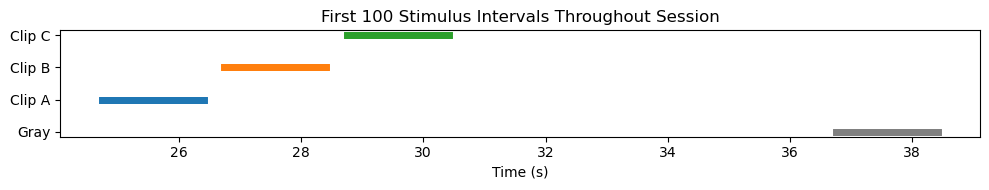

Total presentation counts for each stimulus type: {'gray_presentations': 63000, 'movie_clip_A_presentations': 63000, 'movie_clip_B_presentations': 63000, 'movie_clip_C_presentations': 63000}


In [6]:
stim_names = ['gray_presentations', 'movie_clip_A_presentations', 'movie_clip_B_presentations', 'movie_clip_C_presentations']
colors = ['gray', 'tab:blue', 'tab:orange', 'tab:green']
fig, ax = plt.subplots(figsize=(10, 2))
yoff = 0
for stim_name, color in zip(stim_names, colors):
    tbl = nwb.intervals[stim_name]
    n_plot = min(len(tbl), 100)  # Plot only first 100 for readability
    starts = tbl['start_time'].data[:n_plot]
    stops = tbl['stop_time'].data[:n_plot]
    for s, e in zip(starts, stops):
        ax.plot([s, e], [yoff, yoff], color=color, lw=5)
    yoff += 1
ax.set_yticks(range(len(stim_names)))
ax.set_yticklabels(['Gray', 'Clip A', 'Clip B', 'Clip C'])
ax.set_xlabel('Time (s)')
ax.set_title('First 100 Stimulus Intervals Throughout Session')
plt.tight_layout()
plt.show()

# Print total presentation counts for each type
tbl_summary = {name: len(nwb.intervals[name]) for name in stim_names}
print('Total presentation counts for each stimulus type:', tbl_summary)

## Accessing Behavioral Data: Mouse Running Speed

The NWB file contains processed running speed (cm/s) for the session, accessible via the `running` processing module.

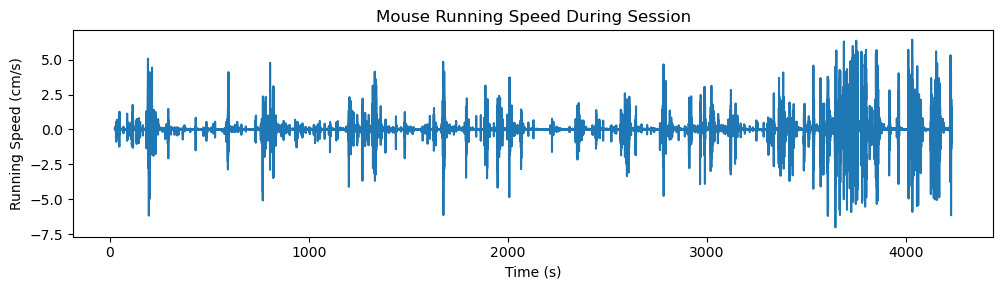

In [7]:
# Load running speed TimeSeries
speed = nwb.processing['running'].data_interfaces['speed']
time = speed.timestamps[:]
speed_cm_per_s = speed.data[:]

plt.figure(figsize=(10, 3))
plt.plot(time, speed_cm_per_s)
plt.xlabel('Time (s)')
plt.ylabel('Running Speed (cm/s)')
plt.title('Mouse Running Speed During Session')
plt.tight_layout()
plt.show()

## Event Detection for Calcium Activity

Automated event detection results (inferred transients) are provided per cell. These can be visualized for exploratory analysis.

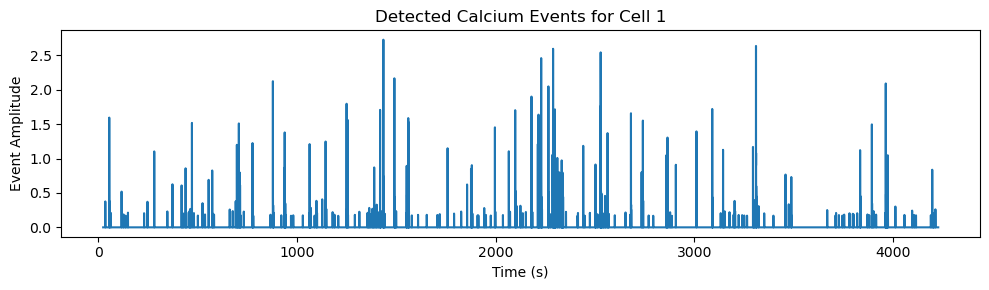

In [8]:
# Get calcium event detection data for one example cell
event_det = nwb.processing['ophys'].data_interfaces['event_detection']
event_data = event_det.data[:, :]     # shape: (time, cells)
event_time = event_det.timestamps[:]

plt.figure(figsize=(10, 3))
plt.plot(event_time, event_data[:, 0])  # Show first cell as example
plt.xlabel('Time (s)')
plt.ylabel('Event Amplitude')
plt.title('Detected Calcium Events for Cell 1')
plt.tight_layout()
plt.show()

## Summary and Next Steps

This notebook has introduced key components of Dandiset 000617:
- How to explore NWB assets via the DANDI API
- How to load NWB files remotely and navigate their structure
- How to access and visualize segmentation data, calcium activity, stimulus intervals, and behavioral signals

With these approaches, you are ready to:
- Align neural activity to stimulus events/trials
- Explore population neural dynamics
- Associate network activity with sensory input or mouse behavior
- Expand into more advanced analyses using these structured data modalities

Refer to the Dandiset's metadata and the Allen Institute's documentation for further details regarding experimental protocol, preprocessing, and biological questions.

**Notebook generated with assistance from AI. Please independently verify any results or code.**